In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

In [2]:
def load_data(dataset_path):
    train_path = os.path.join(dataset_path, "train")
    test_path = os.path.join(dataset_path, "test")

    # Load feature data
    X_train = np.loadtxt(os.path.join(train_path, "X_train.txt"))
    y_train = np.loadtxt(os.path.join(train_path, "y_train.txt"))
    X_test = np.loadtxt(os.path.join(test_path, "X_test.txt"))
    y_test = np.loadtxt(os.path.join(test_path, "y_test.txt"))

    return X_train, y_train, X_test, y_test

In [9]:
# Set dataset path (modify this based on extracted location)
dataset_path = "C:\\Users\\Lenovo\\Desktop\\RESUME PROJECTS\\UCI HAR Dataset"

X_train, y_train, X_test, y_test = load_data(dataset_path)

In [10]:
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Reshape input data for LSTM: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [12]:
# Encode labels and convert to categorical format
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [13]:
# Define LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax for classification
])

D:\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6738 - loss: 0.8886 - val_accuracy: 0.9080 - val_loss: 0.2476
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9429 - loss: 0.1527 - val_accuracy: 0.9467 - val_loss: 0.1511
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9609 - loss: 0.0983 - val_accuracy: 0.9237 - val_loss: 0.2233
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9662 - loss: 0.0931 - val_accuracy: 0.9403 - val_loss: 0.1887
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9730 - loss: 0.0738 - val_accuracy: 0.9430 - val_loss: 0.1903
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9704 - loss: 0.0744 - val_accuracy: 0.9250 - val_loss: 0.2771
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9737 - loss: 0.0678 - val_accuracy: 0.9230 - val_loss: 0.2812
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9784 - loss: 0.0616 - val_accuracy: 0

In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9386 - loss: 0.2398
Test Accuracy: 94.47%


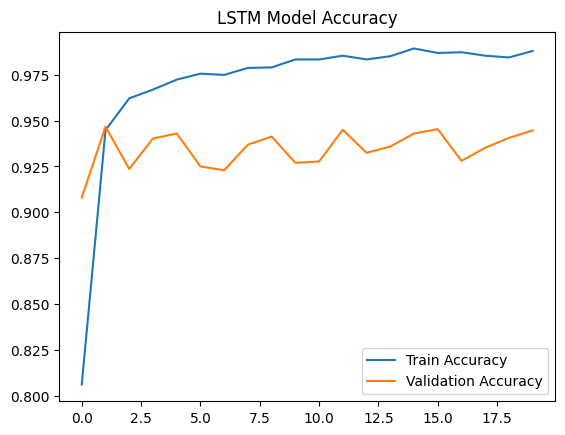

In [17]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('LSTM Model Accuracy')
plt.show()